<a href="https://colab.research.google.com/github/XNexuswolfX/DataScience/blob/main/stats%2Blinalg_gps_start21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 12 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 6 April 2020, with material from Carl Rasmussen, Chris Fonnesbeck, and John P. Cunningham</div>

[Google wins major copyright victory](https://www.msn.com/en-us/news/technology/google-wins-major-copyright-victory/ar-BB1fjQHM?li=BBnb7Kz)

# Statistics + Linear Algebra = Gaussian Processes (GP)

Gaussian Processes is a mix of Bayesian Analysis and Linear Algebra, so it's our ***3rd application of our Linear Algebra***, after **graphs** and **games**.

A machine-learning algorithm that involves a **Gaussian process** uses lazy learning and a measure of similarity between points (the kernel function) to predict the value for an unseen point from training data. The prediction is not just an estimate for that point, but also has uncertainty information: It is a one-dimensional Gaussian distribution.

This technique is a form of interpolation called [kriging](https://en.wikipedia.org/wiki/Kriging) and yields the ***most probable linear unbiased prediction of intermediate (unobserved) values***. Interpolating methods based on other criteria such as smoothness (e.g., smoothing spline) need not yield the most likely intermediate values. 

The theoretical basis for GPs was developed by the French mathematician [Georges Matheron](https://en.wikipedia.org/wiki/Georges_Matheron) in 1960, based on the Master's thesis of [Danie G. Krige](https://en.wikipedia.org/wiki/Danie_G._Krige), the pioneering plotter of distance-weighted average gold grades at the [Witwatersrand reef complex](https://en.wikipedia.org/wiki/Witwatersrand) in South Africa. Krige sought to estimate the most likely distribution of gold based on samples from a few boreholes. Thus, [kriging](https://en.wikipedia.org/wiki/Kriging). 

<br />
<center>
<img src="images/gold-digger.png" width=400 />
</center>

The method is widely used in the domain of spatial analysis. The technique is also known as **Wiener–Kolmogorov** (WK) prediction, after [Norbert Wiener](https://en.wikipedia.org/wiki/Norbert_Wiener) and [Andrey Kolmogorov](https://en.wikipedia.org/wiki/Andrey_Kolmogorov).

The bible on GPs is [Rasmussen & Williams, Gaussian Processes for Machine Learning](http://www.gaussianprocess.org/gpml).

A great Web site with more information on GPs is [gaussianprocess.org](http://www.gaussianprocess.org/).

GPs is one of the most popular model-building frameworks for multivariate data, when the number of dimensions is still not that high (<10). It's is an *advanced* data science tool, though. I don't cover it very often, so you're lucky this semester :-)

But, it's complicated...

## 1. Introduction

Supervised learning can be divided into *regression* and *classification* problems. Whereas the outputs for classification are *discrete* (categorical) class labels, regression is concerned with the prediction of *continuous quantities*. We did regression last week with PyMC3. In my opinion, this is a go-to method for linear regressions.

>**Example**: In a financial application, you may attempt to predict the price of a commodity as a function of interest rates, currency exchange rates, availability and demand. 

Gaussian Processes (GP) is the *state of the art* of **regression modeling**.

When we studied Baeysian estimation, we restricted the class of model functions to consider well known probability density functions arising in probability theory, such as **Poisson**, **Beta**, **Gamma** etc. We picked a prior such distribution, then we used Bayesian analysis to refine with additional observations.

But what happens if, say, our data has a two-humped histogram instead of a one-humped one?

<br />
<center>
<img src="images/camels-humps.jpg" width=600 />
</center>

Today, we're going to see that we can actually take **priors** to be *every possible function*, where higher probabilities are given to functions that we consider to be more likely, for example because they're smoother.

>**Question**: Have statisticians gone mad?! How is it possible to consider *all* possible functions? There are so many!

</br >
<center>
<img src="images/crazyprof.png" width=300 />
</center>

## 2. Definitions

A **Univariate** Gaussian is a distributions over real valued variables.

A **Multivariate** Gaussian is a tuple (e.g. pairs for 2 random variables, triplets for 3 random variables, etc.) of real valued variables.

A **Gaussian Process** is not a countable sequence. It's a **function** of (infinite numbers of) real
valued variables.
 
For example: Assume I want to measure my heart rate. I bike a lot, so my resting heart rate is around 60 bpm. When I competed actively, it could hover sometimes around 39. Suppose I want to measure my heart rate 4 times a day: morning, lunch, afternoon, and bedtime, and then track changes at these timepoints over a month.

Each day, 4 times a day, over a month, I would get a measurement (different every day). From the data, I would use Bayesian estimation to evaluate the pdf of my heart rate over the month, complete with mean and standard deviation, and plotted as a 4D mutlivariate gaussian (it would be a univariate gaussian in the morning, ***another*** univariate gaussian at lunch, ***yet another*** in the afternoon, ***and another*** at bedtime). 

Some days I am well-rested, and others I may be sick or tired, But I'm assuming there will be a degree of correlation between the measurements in the morning, lunch, afternoon, and bedtime. For example, if I'm very tired and have a high heart rate in the morning, chances are it will be high at lunch, too! So I expect to see a non-isotropic 4D gaussian (well, not really ***see***, for I cannot *see* a 4D-plot, but let's just say *imagine* as a 3D generalization).

Then assume I get tired of measuring 4 times a day, and decide to buy a Polar watch, that automatically logs heart rate ***every 10 minutes a day***.

</br >
<center>
<img src="images/polar-hr.jpg" width=200 />
</center>

There are 24 * 6 = 144 10-minute intervals a day, so now I have a 144-D multivariate Gaussian. 

Assume I go ***nuts*** and decide to measure heart-rate every 10 ***seconds***. How many dimensions does my mutlivariate Gaussian have? And what's the correlation between each univariate Gaussian? Pretty high, right?

Let's take this process to the limit, where I essentially start sampling from a **function** defined over a day on the x-axis, and heart-rate on the y-axis, which is what my watch would give me at the end of the day when I connect it to my laptop! That function is called a [gaussian process](https://en.wikipedia.org/wiki/Gaussian_process).
               
> **_IMPORTANT:_**  Whereas a **univariate** Gaussian distribution is determined by its mean and standard deviation, and whereas a **multivariate** Gaussian distribution is determined by its **mean** and **covariance matrix**, a **Gaussian process** is determined by its **mean function**, $\mu(s)$, and **covariance function**, $C(s,t)$. That's because the generalization of a vector in infinite [$\aleph_1$ dimensions](https://en.wikipedia.org/wiki/Aleph_number#Aleph-one) (*both* infinitely big *and* infinitely small) is a **function**.

> **_EXAMPLE:_** Covariate function between $x$ and $y$: $$C(x,y) = e^{(x-y)^2}$$

The mean function defines the mean height of the function at each point and the covariance function affects properties like the smoothness of the function, periodicity, etc. by saying how correlated each pair of points is.

You can approximate a Gaussian process on an interval by selecting S to be a grid of $N$ evenly spaced points in that interval. Then to sample from the process, you can just sample a multivariate Gaussian distribution with a covariance **matrix** sampling the covariance **function** and a mean **vector** sampling the **mean** function. If you plot your sample versus your grid, you will see a smooth curve (assuming you used a common covariance function, like the power exponential).

> **_EXAMPLE:_** $$C(x_i,y_j) = e^{(x_i-y_j)^2} \;\;\text{for} \; (i,j) \; \text{in} \; {0,1,2,.., N}\;\; \text{that's a matrix!}$$

## 3. Countably infinite ($\aleph_0$) and uncountably infinite ($\aleph_1$, $\aleph_2$) sets

We started class with **dictionaries**, then moved on to **probability distributions** or pdfs. Now whereas a probability distribution describes random variables which are **scalars** (**vectors** of scalars for multivariate distributions), a general **stochastic process** governs the properties of **functions**. 

There are an [uncountably](https://en.wikipedia.org/wiki/Uncountable_set) infinite set ($\aleph_2$) of functions! How are we going to compute with this set in a finite amount of time? 

> **_STRANGE MATH:_**  The cardinality (length) of natural numbers (0,1,2,3,...) is $\aleph_0$. There's an infinite number of naturals, but you can count them. The cardinality of real numbers is much bigger and uncountable because they're inifinitely big, but also infinitely small. The cardinality of functions (mappings from reals to reals) is actually *even bigger* and just as uncountable: it's $\aleph_2$. This is all part of **set theory**, look [here](https://en.wikipedia.org/wiki/Aleph_number) for more detail.

We ***can*** deal computationally with these infinite dimensional objects because if you ask *only* for the properties of the function at a *finite* number of points (our sampling grid), then inference in the Gaussian process will give you the same answer whether you have infinitely many other points or not.

> **_IMPORTANT:_**  You *can* loosely think of a function as a *very long vector* (collection), each entry of which specifies the function value $f(x)$ at a particular input $x$, right? And if our collection $[x]$ is finite, then our $[f(x)]$ collection is finite, too.

Now, how to pick the functions? Let's consider a simple 1-d regression problem, mapping from an input $x$ to an output $f(x)$.
In the figure below we show a number of sample functions drawn at random from our prior distribution over functions which favours smooth functions. Then we freeze two observations in our posterior, so that immediately reduces the functions that we can use to those that cross these two observations. 

</br >
<center>
<img src="images/gp-prior-posterior.png" width=500 />
</center>

So, how many functions do you think we can fit through 2 points? How many functions do you think you can fit through our ***point cloud bunny***?

Let's keep it simple and see how many functions do you think we can fit through 5 points in a 1D graph.

[Vandermonde matrices](https://en.wikipedia.org/wiki/Vandermonde_matrix) help us interpolate polymials through point clouds. Specifying the points we want the polynomial to go through *freeze* the polynomial for us. Here's an example with 5 points:

```python
# freeze 5 observations that our functions needs to go through
x1 = numpy.array([-3.2, -1.5, 0.3, 0.7, 2.5])    # points where we know values
y = numpy.array([ 4.5,  0.5, 0.6, 1.2, 3.5])     # values at those points
```

Go ahead, play with the observations below, modify them. You will always have the originals here above!

[-0.03180657 -0.1257808   0.64265738  0.97515726  0.25326737]
B = [[ 1.048576e+02 -3.276800e+01  1.024000e+01 -3.200000e+00  1.000000e+00]
 [ 5.062500e+00 -3.375000e+00  2.250000e+00 -1.500000e+00  1.000000e+00]
 [ 8.100000e-03  2.700000e-02  9.000000e-02  3.000000e-01  1.000000e+00]
 [ 2.401000e-01  3.430000e-01  4.900000e-01  7.000000e-01  1.000000e+00]
 [ 3.906250e+01  1.562500e+01  6.250000e+00  2.500000e+00  1.000000e+00]] 
p = [-0.03180657 -0.1257808   0.64265738  0.97515726  0.25326737]
p(x) = -0.03180657205425007x^4 + -0.12578079528543923 x^3 + 0.642657379886482 x^2 + 0.97515726018048 x + 0.253267372462419 is the unique quartic polynomial that interpolates these points.


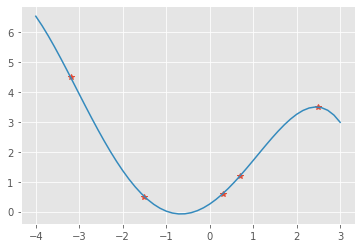

In [ ]:
%matplotlib inline
import numpy
from matplotlib import pyplot
pyplot.style.use('ggplot')

# our x-axis and our vandermonde degree 3 matrix
x = numpy.linspace(-4, 3)
A = numpy.array([x**4, x**3, x**2, x, 1+0*x]).T

# freeze 5 observations that our functions needs to go through
x1 = numpy.array([-3.2, -1.5, 0.3, 0.7, 2.5])    # points where we know values
y = numpy.array([ 4.5,  0.5, 0.6, 1.2, 3.5])     # values at those points

pyplot.plot(x1, y, '*')
B = numpy.vander(x1)                     # Vandermonde matrix at the known points
p = numpy.linalg.solve(B, y)             # Compute the polynomial coefficients
print(p)
pyplot.plot(x, A.dot(p))                 # Plot the polynomial evaluated at all points
print('B =', B, '\np =', p)
print('p(x) = ' + str(p[0]) + 'x^4 + ' + 
                  str(p[1]) + ' x^3 + ' + 
                  str(p[2]) + ' x^2 + ' + 
                  str(p[3]) + ' x + ' + 
                  str(p[4]) + ' is the unique quartic polynomial that interpolates these points.')

There is a ***unique*** quartic (power-4) polynomial that passes through these points $(x,y)$, solution to $Y = X * \alpha$:

$$ y = ax^4 + bx^3 +cx^2 + dx + e = \Bigg[ x^4 \Bigg|\, x^3 \Bigg|\, x^2 \Bigg|\, x \,\Bigg|\, 1 \Bigg] \begin{bmatrix}a \\ b \\ c \\ d \\ e \end{bmatrix}$$

Which we solve with the linear algebra above, with a little bit of help from our friend, the API `numpy.linalg.solve`: $\alpha = Y * X^{-1}$.

...but there is an ***uncountably infinite*** number of functions that pass through these 5 points when we consider ***all possible functions***, including polynomials higher than quartic, exponentials, gaussians, Poissons, Gammas, and all possible functions in the universe.

> **_IMPORTANT:_** By the way, what's the **definition** of a function?

### Learning in a Gaussian Process

Ok, the example above is just a quartic polynomial and our space of all possible functions consists of ***much much more*** than quartic polynomials.

So we have more choices and more functions that cross these points (in fact, still an uncountable infinite set)

But we *did manage to restrict* our function space, if you can still talk about restricing uncountably infinite sets. If we pick ***polynomials***, the higher number the points, the higher the degree of the polynomial! They will oscillate ***so much*** between observations, that they will predict gold deposits ***out of this world*** at some points, if we're Danie Krige and prospecting for gold. That's *no good*.

</br >
<center>
<img src="images/analytic-interpolations.png" width=400 />
    *smooth high-degree polynomial functions oscillate **a lot***
</center>

Gaussian processes (GPs) define a distribution on continuous functions with a continuous domain. We observe some points and want to assign probabilities to every possible way a curve could be drawn through those points, ***realistically***. 

> **_IMPORTANT:_** The hope is the curves with highest probability are very similar to that true function we can (usually) never observe (e.g. the gold deposit profile under the mountain). Then the question is how to assign probability to each curve. 

GPs parameterize the probability in terms of a $n$x$n$ covariance matrix: A distance function (also called a **kernel function** of the user's choice) is calculated for ***every pair*** of the $n$ total **observed points**. 

So we have a mulitvariate distribution, right? If we have N observation points, we have ourselves an N-variate distribution in N-D space. 

All this matrix does is control the GP's preference for **smoothness**. 

- If the kernel function results in a **high value** for one pair of points, then the GP assigns a **higher probability** to functions that connect those points with a relatively *simple* curve, like a **line** (smooth, doesn't have a bunch of wiggles). 

What is considered smooth or not is determined by the kernel function.

- Although the specific random functions that cross these points do not have a **mean** of zero, you can imagine that as we plot more and more of them, the mean of $f(x)$ values for any fixed $x$, for all these functions combined, would go to zero independently of $x$. 

We can also characterize the *variability* of each of these functions, by computing the pointwise difference between all possible pairs $(p,q)$ of cov$_{(p,q)}(f(x_p, x_q))$ in our interval of interest. 

> **_IMPORTANT:_** The more ***herky-jerky*** the function **f** is, the higher the variance (the values ***vary*** a lot). The smoother $f$ is, the lower the variance (the values ***vary*** little). 

So each of these functions $f$ that we consider has a **covariance matrix**. In fact, it is well characterized by this matrix. What functions $f$ do we need so that the covariance matrix can be put in the form of a matrix of squared exponentials like so:

$$cov_{(p,q)}(f(x_p), f(x_q)) = exp(-\frac{1}{2}(x_p - x_q)^2)$$

It turns out, if you do the math, that if our functions $f$ are linear combinations of gaussians, the equality above holds! 

- It can be shown (with math) that a squared exponential covariance function corresponds to a Bayesian **linear regression** model. Also, we can obtain that the covariance function from a linear combination of an infinite number of Gaussian-shaped functions. This is called [Mercer's theorem](https://en.wikipedia.org/wiki/Mercer%27s_theorem).

Ok, good, so that is the process:

> We have a **prior distribution of functions** (see figure (a) above), the same way we had prior distributions for each model parameter in Bayesian estimation. 

> We then observe **data points**. That freezes covariance functions to covariance matrices for each of these functions in the prior distribution of functions. If we have 30 data points, the covariance matrix for the covariance function $f$ will be a 30 x 30 matrix, and the matrix will contain in each cell the covariance between pairs of these 30 points. 

> Our family of priors are ***shoehorned*** through these data points $(x_p, y_p)_p$ by ensuring that $f(x_p) = y_p$ for each $p$. This downselects our possible priors and yields our **posterior distribution of functions** (see figure (b) above).

</br >
<center>
<img src="images/shoehorn.jpg" width=300 />
    *Shoehorn*
</center>

Even when a lot of observations have been added, there is still a lot of flexibility left in the functions $f$ we can choose, because the cardinality of function is [$\aleph_1$](https://en.wikipedia.org/wiki/Aleph_number).

Note that this process is called a **non-parametric model**. We had to find particular parameters for a *cubic polynomial* to go through some datapoints because the set of all possible cubic polynomials is *infinitely smaller* than the set of all possible functions. Likewise, you'd have to find the right $(\alpha, \beta)$ parameters for a $Gamma$ to match any histogram (as you did in your homework). But with GPs, we have an *infinite* number of functions to play with!

Keep in mind we still end up with **hyperparameters** for MCMC methods to optimize. But these hyperparameters will be *global* to our data, not determined by *local* considerations about which points to go through.

These hyperparameters will control the **smoothness** (that is a *global* characteristic) of the functions $f$ we will pick. And that smoothness is determined for each function $f$ by its covariance matrix over the datapoints. 

> **_IMPORTANT:_**  The problem of *learning* in a Gaussian processes is exactly the problem of finding suitable *local* properties for the covariance matrix (*local* because the covariance matrix depends on the datapoints), which gives us functions that go though the data and thus model the underlying process that generates this data, as well as *global* characteristics of the data (smoothness, length-scale, etc.) that we can interpret.

So you see, GPs are quite different from the classical pdfs used in Bayesian estimation (Poisson, Gamma, etc.). 

> **_HOW YOUR BRAIN WORKS:_**: Your brain is essentially a giant **geometry machine**, building curves that pass through your experiences (observations, or datapoints) and help you build models that generalize rules about life, which you follow as best you can in order to maximize happiness.

For example: for maximum happiness , find data science job, study *hard* for INFO 6105 :-)

</br >
<center>
<img src="images/happy-students.png" width=400 />
</center>

## 4. Picking the priors

Let's demonstrate with a bit of python how we obtain realizations from a Gaussian process, which result in an evaluation of a function over a set of points (from **priors** to **posteriors**).

- All we will do here is sample from the **prior** Gaussian process, so before any data have been introduced. What we need first is our **covariance function**, which we will pick to be the **squared exponential**, and a function `exponential_cov()` to evaluate the covariance at given points (resulting in a covariance matrix). We will paramterize it woth two parameters `params[0]` and `params[1]`:

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

We are going to generate realizations sequentially, point by point, using multivariate Gaussian distributions. 

### First, a bit of probability theory:

A **joint probability** is a statistical measure where the likelihood of two events occurring *together* and *at the same point in time* are calculated. Joint probability is the probability of event Y occurring at the same time event X occurs. We talk about $P(X∩Y)$ or $P(X \text{ and } Y)$ or $P(XY)$. 

What's the probability that you get snake-eyes (two 1's) with two dice, where X is the probability of one and Y the probability of the other? $1/6 * 1/6 = 1 / 36$, right?

Likewise, from a deck of 52 cards, the joint probability of picking up a card that is red ***and*** an ace is $P(\text{ace} ∩ \text{red}) = 2/52 = 1/26$, since a deck of cards has two red aces – the ace of hearts and the ace of diamonds. You can also use a formula to calculate the joint probability: $P(\text{ace} ∩ \text{red}) = P(\text{ace}) * P(\text{red}) = 4/52 * 26/52 = 1/26$.

A **conditional probability** is the probability that one event will happen *given* that another action or event *has happened*. The conditional probability form is $P(X│Y)$ – that is, the chance of one event happening is conditional on another event happening. For example, from a deck of cards, the probability that you get an ace, given that you drew a red card is $P(\text{ace}│\text{red}) = 2/26 = 1/13$, since there are two aces out of 26 red cards. Not the same as $1/26$, right?

### Then, a bit of linear algebra :-)

If we have the **joint probability** $\mathcal{J}$ of two variables $x_1$ and $x_2$, characterized by the mean of each $\mu_1$ and $\mu_2$, and covariance matrix of the 4 possible standard deviations (self for each $\sigma_{11}$ and $\sigma_{22}$, and cross for each $\sigma_{12}$ and $\sigma_{21}$), we write:

$$\mathcal{J}\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
\sim \mathcal{J} 
{\left(
\begin{pmatrix}
\mu_1 \\
\mu_2
\end{pmatrix}
,
\begin{pmatrix}
\sigma_{11} & \sigma_{12}\\
\sigma_{21} & \sigma_{22}\\
\end{pmatrix}
\right)}$$

It is also possible to get the **conditional probability** $\mathcal{C}$ of one of the variables given the other:

$$\mathcal{C}\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
\sim \mathcal{C} 
{\left(
\begin{pmatrix}
\mu_1 \\
\mu_2
\end{pmatrix}
,
\begin{pmatrix}
\sigma_{11} & \sigma_{12}\\
\sigma_{21} & \sigma_{22}\\
\end{pmatrix}
\right)}$$

There are math formulas for $\mathcal{J}$ and $\mathcal{C}$, which we choose to skip.

Now instead of variables $x_1$ and $x_2$, assume we have a sequence of functions $f_1, \cdots, f_n$, and that some ($f$) are known (training data) while some ($f_*$) are unknown (test data). In classic Bayesian inference terminology, we talk about the known ones as **priors**, and the unknown ones as **posteriors**. In Machine learning terminology, we talk about *training data* and *test data*. But.. same thing! 

We write:

$$\mathcal{C}\begin{pmatrix}
f \\
f_*
\end{pmatrix}
\sim \mathcal{C} \;
{\left(
\begin{pmatrix}
\mu \\
\mu_*
\end{pmatrix}
,
\begin{pmatrix}
K & K_*\\
K_*^T & K_{**}\\
\end{pmatrix}
\right)}$$

Here, $K$ is the matrix we get by applying a **kernel function** to our prior functions $(f)$, i.e. the similarity of each prior to each other prior. 

$K_*$ gets us the similarity of the training values to the test values (or priors to posteriors) whose output values we’re trying to estimate. 

$K_{∗∗}$ gives the similarity of the test values (posteriors) to each other. 

The two most commonly used kernel functions in GP modeling are the **Gaussian**, and the **Matern 5/2**. The Gaussian is:

$$k(x, x') = \mathrm{exp}\left[ -\frac{(x - x')^2}{2 \ell^2} \right]$$

and for an equally spaced sampling of $x$'s tends to look like:

</br >
<center>
<img src="images/gaussianpriors.png" width=500 />
</center>

and the Matern 5/2 is:

$$k(x, x') = \left(1 + \frac{\sqrt{5(x - x')^2}}{\ell} +
            \frac{5(x-x')^2}{3\ell^2}\right)
            \mathrm{exp}\left[ - \frac{\sqrt{5(x - x')^2}}{\ell} \right]$$
            
and for an equally spaced sampling of $x$'s tends to look (much smoother, right?) like:

</br >
<center>
<img src="images/maternpriors.png" width=500 />
</center>

>**Question**: Professor, are these functions essentially **basis functions** for functions, the way we have **basis** vectors for vector spaces?
>**Answer**: Yes!
            
Ok, so how do we get the priors and posteriors? 

> **Priors**:  We get the priors by conditioning the gaussians (or the Materns) in the covariance matrix on our training datapoints. 

> **Posteriors**: And we get the posteriors by MCMC-sampling from the posterior!


### Why Gaussians?

Adopting a set of Gaussians (a multivariate normal vector) as our multivariate distributions confers a number of advantages. First, the [marginal distribution](https://en.wikipedia.org/wiki/Marginal_distribution) of any subset of elements from a multivariate normal distribution is ***also normal***:

$$\text{if} \;\; p(x,y) = \mathcal{N}\left(\left[{
\begin{array}{c}
  {\mu_x}  \\
  {\mu_y}  \\
\end{array}
}\right], \left[{
\begin{array}{c}
  {\Sigma_x} & {\Sigma_{xy}}  \\
  {\Sigma_{xy}^T} & {\Sigma_y}  \\
\end{array}
}\right]\right)$$

$$\text{then}\;\; p(x) = \int p(x,y) dy = \mathcal{N}(\mu_x, \Sigma_x)$$

Also, if you have a multivariate normal vector ${\boldsymbol Y} \sim \mathcal{N}(\boldsymbol\mu, \Sigma)$, consider partitioning $μ$ and $Y$ into:

$$\boldsymbol\mu
=
\begin{bmatrix}
 \boldsymbol\mu_1 \\
 \boldsymbol\mu_2
\end{bmatrix}$$

$$\boldsymbol Y
=
\begin{bmatrix}
 \boldsymbol y_1 \\
 \boldsymbol y_2
\end{bmatrix}$$

with a similar partition of $Σ$ into

$$\begin{bmatrix}
\Sigma_{11} & \Sigma_{12}\\
\Sigma_{21} & \Sigma_{22}
\end{bmatrix}$$

Then, $({\boldsymbol y}_1|\;{\boldsymbol y}_2={\boldsymbol a})$, the conditional distribution of the first partition given the second, is $\mathcal{N}(\overline{\boldsymbol\mu},\overline{\Sigma})$ with mean:

$$\overline{\boldsymbol\mu}=\boldsymbol\mu_1+\Sigma_{12}{\Sigma_{22}}^{-1}({\boldsymbol a}-\boldsymbol\mu_2)$$

and covariance matrix:

$$\overline{\Sigma}=\Sigma_{11}-\Sigma_{12}{\Sigma_{22}}^{-1}\Sigma_{21}$$

[Here](http://fourier.eng.hmc.edu/e161/lectures/gaussianprocess/node7.html) is the full proof, if you're interested. 

So, we can write that conditionals distributions of a subset of multivariate **normal** distributions (conditional on the remaining elements) are **normal** too:

$$p(x\;|\;y) = \mathcal{N}(\mu_x + \Sigma_{xy}\Sigma_y^{-1}(y-\mu_y), 
\Sigma_x-\Sigma_{xy}\Sigma_y^{-1}\Sigma_{xy}^T)$$

> **_IMPORTANT:_**  What does this mean? It means that if we **condition** unobserved (i.e. to be predicted) gaussian multivariate distributions on **observed** gaussian multivariate distributions, we have a math formula for their pdf. So we can ***predict*** the distribution of datapoints based on observations, which is what we want to do when we interpolate from observations.

You can find *all* the math in [RW](http://www.gaussianprocess.org/gpml), or also, [here](http://fourier.eng.hmc.edu/e161/lectures/gaussianprocess/).

### What to remember

A Gaussian process generalizes the multivariate normal to **infinite dimensions**. It is defined as an **infinite collection of random variables**, any finite subset of which has a multivariate Gaussian distribution. Another way of thinking about an **infinite vector** is as a **function**. When we write a function that takes continuous values as inputs, we are essentially specifying an infinte vector that only returns values (indexed by the inputs) when the function is called upon to do so. 

- So we are never required to store all the elements of the Gaussian process, only to calculate them on demand. That is the great advantage of **functions**: We don't need to store the data; the function computes the data ***on demand***! 

**Generators** are functions that compute datapoints on demand. A function is the *perfect* ***low-dimensional*** model of the world. ***That is*** what your brain does: models functions out of yor life's experience.

- If you want to store all natural numbers, you need infinite RAM. A much simpler alternative is to store the generator function that generates them!

So, a Gaussian Process (GP) is a ***distribution over functions***, much like probabilities are distributions over random variables. 

- Just as a **univariate gaussian distribution** is completely specified by a **mean** and a **standard deviation**; just as a **multivariate normal distribution** is completely specified by a **mean vector** and **covariance matrix**, so a GP is fully specified by a **mean function** and a **covariance function**:

$$p(x) \sim \mathcal{GP}(m(x), k(x,x^{\prime}))$$

For example, one specification of a GP might be as follows:

$$\begin{aligned}
m(x) &=0 \\
k(x,x^{\prime}) &= \theta_1\exp\left(-\frac{\theta_2}{2}(x-x^{\prime})^2\right)
\end{aligned}$$

Here, the covariance function is a **squared exponential**, for which values of $x$ and $x^{\prime}$ that are close together result in values of $k$ closer to 1 and those that are far apart return values closer to zero. 

- It may seem odd to simply adopt the zero function to represent the mean function of the Gaussian process -- surely we can do better than that! It turns out that most of the learning in the GP involves the covariance function and its parameters, so very little is gained in specifying a complicated mean function.

For a *finite number of points*, the GP becomes a **multivariate normal**, with mean and covariance **values** as the mean **function** and covariance **function** ***evaluated at those points***.

### END of *what to remember*

So, once again, the conditional of a multivariate Gaussian distributions is:

$$p(x\;|\;y) = \mathcal{N}(\mu_x + \Sigma_{xy}\Sigma_y^{-1}(y-\mu_y), 
\Sigma_x-\Sigma_{xy}\Sigma_y^{-1}\Sigma_{xy}^T)$$

And this is the function that implements it, with the math above:

In [ ]:
def conditional(x_new, x, y, params):
    B = exponential_cov(x_new, x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())

Let's see all this in action.

Let's start with a Gaussian process prior with hyperparameters $\theta_0=1, \theta_1=10$. We will also assume a zero function as the mean, so we can plot a **band** that represents one standard deviation from the mean (0).

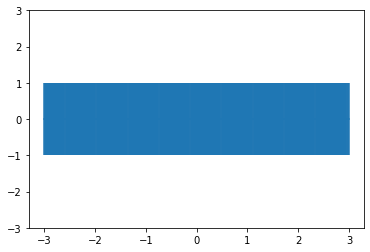

In [ ]:
θ = [1, 10]
σ_0 = exponential_cov(0, 0, θ)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=σ_0, capsize=0)
plt.ylim(-3, 3);

Let's select an arbitrary starting point to sample, say $x=1$. Since there are no prevous points, we can sample from an unconditional Gaussian:

In [ ]:
np.random.seed(42)
x = [1.]
y = [np.random.normal(scale=σ_0)]
y

[0.4967141530112327]

We can now update our confidence band, given the point that we just sampled, using the covariance function to generate new point-wise intervals, conditional on the value $[x_0, y_0] = [1, 0.4967]$. Here we implement the math behind conditional gaussian distributions (which we skipped).

In [ ]:
σ_1 = exponential_cov(x, x, θ)
σ_1

array([[1.]])

In [ ]:
def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

In [ ]:
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, θ, σ_1, y) for i in x_pred]

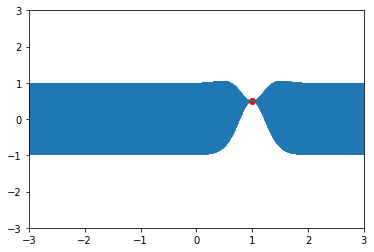

In [ ]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3);

So conditional on this point and the covariance structure we have specified, we have essentially constrained the probable location of new additional points to the colored surface area plotted above.

Let's now sample another datapoint:

In [ ]:
m, s = conditional([-0.7], x, y, θ)
y2 = np.random.normal(m, s)
y2

-0.1382640378102619

This point is added to the realization, and can be used to further update the location of other points.

In [ ]:
x.append(-0.7)
y.append(y2)

In [ ]:
σ_2 = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_2, y) for i in x_pred]

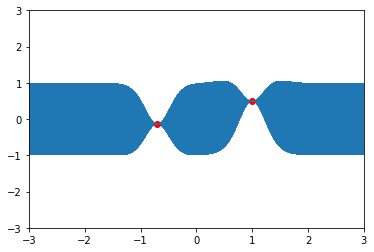

In [ ]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3);

We can just as easily sample several points at once:

In [ ]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, θ)
y_more = np.random.multivariate_normal(mu, s)
y_more

array([-1.5128756 ,  0.52371713, -0.13952425, -0.93665367, -1.29343995])

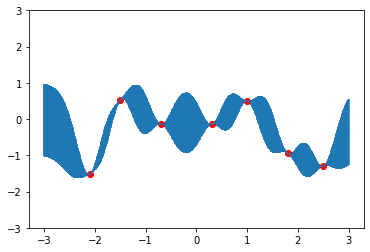

In [ ]:
x += x_more
y += y_more.tolist()

σ_new = exponential_cov(x, x, θ)

predictions = [predict(i, x, exponential_cov, θ, σ_new, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.ylim(-3, 3);

So, given our covariance function, the more points we observe, the smaller the colored surface, and the more constrained where we can place new points. 

That makes good sense, because our covariance function is a function $f(x,x_*)$ whoose predetermined smoothness characteristic constrains the location of $x_*$ given the fixed locations of $x$ (observations).

## 5. GPs with scikit-learn

`scikit-learn` is the easiest machine learning package for Python. It provides a comprehensive set of supervised and unsupervised learning algortihms. Included among its library of tools is a Gaussian process module. 

Consistent with the implementation of other machine learning methods in `scikit-learn`, the appropriate interface for using GPs depends on the type of task at hand. For **regression** tasks, where we are predicting a **continuous response variable**, a `GaussianProcessRegressor` is applied by specifying an appropriate covariance function, or **kernel**. 
- Fitting proceeds by maximizing the log of the marginal likelihood, a convenient approach for Gaussian processes that avoids the computationally-intensive [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) strategy that is usually employed in choosing optimal hyperparameters for the model. 
- The `GaussianProcessRegressor` does not allow for the specification of the mean function, always assuming it to be the zero function, highlighting the diminished role of the mean function in calculating the posterior.

For **classification** tasks, where the output variable is **categorical** (or **binary**), the `GaussianProcessClassifier` is used. 
- Similar to the regression setting, the user chooses an appropriate kernel to describe the type of covariance expected in the dataset
- The posterior of this GP however, is non-normal. A **Laplace approximation** is used to obtain a solution, rather than maximizing marginal likelihood

`scikit-learn` offers a library of about a dozen covariance functions, **kernels**, to choose from. A flexible choice to start with is the [Mat&#232;rn covariance](https://en.wikipedia.org/wiki/Mat%C3%A9rn_covariance_function). It is in fact, the *most used kernel* in GP methods:

$$k_{M}(x) = \frac{\sigma^2}{\Gamma(\nu)2^{\nu-1}} \left(\frac{\sqrt{2 \nu} x}{l}\right)^{\nu} K_{\nu}\left(\frac{\sqrt{2 \nu} x}{l}\right)$$

where where $\Gamma$ is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function) and $K$ is a [modified Bessel function](https://en.wikipedia.org/wiki/Bessel_function#Modified_Bessel_functions). The form of covariance matrices sampled from this function is governed by ***three parameters***, each of which controls a property of the covariance:

* **amplitude** ($\sigma$) controls the scaling of the output along the y-axis. This parameter is just a scalar multiplier, and is therefore usually left out of implementations of the Mat&#232;rn function (*i.e.* set to one)

* **lengthscale** ($l$) complements the amplitude by scaling realizations on the x-axis. Larger values make points appear closer together.

* **roughness** ($\nu$) controls the sharpness of ridges in the covariance function, which ultimately affect the roughness (smoothness) of realizations.

Though in general all the parameters are non-negative real-valued, when $\nu = p + 1/2$ for integer-valued $p$, the function can be expressed partly as a polynomial function of order $p$ and generates realizations that are $p$-times differentiable, so values $\nu \in \{3/2, 5/2\}$ are extremely common.

A GP kernel can be specified as the sum of additive components in `scikit-learn` simply by using the sum operator, so we can include a Mat&#232;rn component (`Matern`), an amplitude factor (`ConstantKernel`), as well as an observation noise (`WhiteKernel`):

Here's some ***non-linear*** data I copied from the bible on GPs:

In [5]:
import numpy as np

x = np.array([-5, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4, 
-3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3, -2.9, 
-2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2, -1.9, -1.8, 
-1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.9, -0.8, -0.7, 
-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 
0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 
1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 
3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 
4.5, 4.6, 4.7, 4.8, 4.9, 5])

y = np.array([1.04442478194401, 0.948306088493654, 0.357037759697332, 0.492336514646604, 
0.520651364364746, 0.112629866592809, 0.470995468454158, -0.168442254267804, 
0.0720344402575861, -0.188108980535916, -0.0160163306512027, 
-0.0388792158617705, -0.0600673630622568, 0.113568725264636, 
0.447160403837629, 0.664421188556779, -0.139510743820276, 0.458823971660986, 
0.141214654640904, -0.286957663528091, -0.466537724021695, -0.308185884317105, 
-1.57664872694079, -1.44463024170082, -1.51206214603847, -1.49393593601901, 
-2.02292464164487, -1.57047488853653, -1.22973445533419, -1.51502367058357, 
-1.41493587255224, -1.10140254663611, -0.591866485375275, -1.08781838696462, 
-0.800375653733931, -1.00764767602679, -0.0471028950122742, -0.536820626879737, 
-0.151688056391446, -0.176771681318393, -0.240094952335518, -1.16827876746502, 
-0.493597351974992, -0.831683011472805, -0.152347043914137, 0.0190364158178343, 
-1.09355955218051, -0.328157917911376, -0.585575679802941, -0.472837120425201, 
-0.503633622750049, -0.0124446353828312, -0.465529814250314, 
-0.101621725887347, -0.26988462590405, 0.398726664193302, 0.113805181040188, 
0.331353802465398, 0.383592361618461, 0.431647298655434, 0.580036473774238, 
0.830404669466897, 1.17919105883462, 0.871037583886711, 1.12290553424174, 
0.752564860804382, 0.76897960270623, 1.14738839410786, 0.773151715269892, 
0.700611498974798, 0.0412951045437818, 0.303526087747629, -0.139399513324585, 
-0.862987735433697, -1.23399179134008, -1.58924289116396, -1.35105117911049, 
-0.990144529089174, -1.91175364127672, -1.31836236129543, -1.65955735224704, 
-1.83516148300526, -2.03817062501248, -1.66764011409214, -0.552154350554687, 
-0.547807883952654, -0.905389222477036, -0.737156477425302, -0.40211249920415, 
0.129669958952991, 0.271142753510592, 0.176311762529962, 0.283580281859344, 
0.635808289696458, 1.69976647982837, 1.10748978734239, 0.365412229181044, 
0.788821368082444, 0.879731888124867, 1.02180766619069, 0.551526067300283])

N = len(y)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

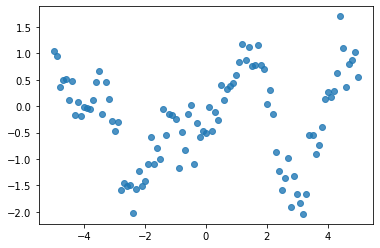

In [ ]:
sns.regplot(x, y, fit_reg=False)

Let's specify a covariance function, or **kernel**:

In [ ]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

All `scikit-learn` functions expect a tabular set of input variables, either as a 2-dimensional NumPy `array` or a pandas `DataFrame`. 

Since we have only a single input variable here, we add a second dimension using the `reshape` method:

In [ ]:
x.shape

(101,)

In [6]:
X = x.reshape(-1, 1)
X.shape

(101, 1)

In [ ]:
x

array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
       -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ])

In [ ]:
X.T

array([[-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
        -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
        -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
         0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
         1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
         2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
         3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
         4.9,  5. ]])

 We instantiate a `GaussianProcessRegressor` object with our custom kernel, and call its `fit` method, passing the input (`X`) and output (`y`) arrays, very much like we do with skikit-learn's regression forest:

In [ ]:
y

array([ 1.04442478,  0.94830609,  0.35703776,  0.49233651,  0.52065136,
        0.11262987,  0.47099547, -0.16844225,  0.07203444, -0.18810898,
       -0.01601633, -0.03887922, -0.06006736,  0.11356873,  0.4471604 ,
        0.66442119, -0.13951074,  0.45882397,  0.14121465, -0.28695766,
       -0.46653772, -0.30818588, -1.57664873, -1.44463024, -1.51206215,
       -1.49393594, -2.02292464, -1.57047489, -1.22973446, -1.51502367,
       -1.41493587, -1.10140255, -0.59186649, -1.08781839, -0.80037565,
       -1.00764768, -0.0471029 , -0.53682063, -0.15168806, -0.17677168,
       -0.24009495, -1.16827877, -0.49359735, -0.83168301, -0.15234704,
        0.01903642, -1.09355955, -0.32815792, -0.58557568, -0.47283712,
       -0.50363362, -0.01244464, -0.46552981, -0.10162173, -0.26988463,
        0.39872666,  0.11380518,  0.3313538 ,  0.38359236,  0.4316473 ,
        0.58003647,  0.83040467,  1.17919106,  0.87103758,  1.12290553,
        0.75256486,  0.7689796 ,  1.14738839,  0.77315172,  0.70

In [ ]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(X, y)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


GaussianProcessRegressor(kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1))

`scikit-learn` displays the configuration that is used for the fitting algorithm each time one of its classes is instantiated. 

- This is useful because it reveals hidden settings that are given default values if not specified by the user; these settings can often influence the resulting fit, so its important that we understand what `fit` has assumed on our behalf. 

Here, for example, we see that the L-BFGS-B algorithm has been used to optimized the hyperparameters (`optimizer='fmin_l_bfgs_b'`) and that the output variable has not been normalized (`normalize_y=False`). 

- When there is a fear of finding a local, rather than a global maximum in the marginal likelihood, a non-zero value can be specified for `n_restarts_optimizer`, which will run the optimization algorithm as many times as specified, using randomly-chosen starting coordinates, in the hope that a globally-competitive value can be discovered.

The `fit` method endows the returned model object with attributes associated with the fitting procedure; these attributes will all have an underscore (`_`) appended to their names. For example, the `kernel_` attribute will return the kernel used to parameterize the GP, along with their corresponding optimal hyperparameter values:

In [ ]:
gp.optimizer

'fmin_l_bfgs_b'

Along with the `fit` method, each supervised learning class retains a `predict` method that generates predicted outcomes ($y^*$) given a new set of predictors ($X^*$) distinct from those used to fit the model (the so-called test cases, or just a new $x$ that we want to predict the interpolated $y$ value for). 

For a Gaussian process, this is fulfulled by the **posterior predictive distribution**, which is the Gaussian process with the mean and covariance functions updated to their posterior forms, after having been fit. 

$$p(y^*|y, x, x^*) = \mathcal{GP}(m^*(x^*), k^*(x^*))$$

The posterior mean and covariance functions are calculated as:

$$\begin{aligned}
m^*(x^*) &= k(x^*,x)^T[k(x,x) + \sigma^2I]^{-1}y \\
k^*(x^*) &= k(x^*,x^*)+\sigma^2 - k(x^*,x)^T[k(x,x) + \sigma^2I]^{-1}k(x^*,x)
\end{aligned}$$

Let's do this for a range of $x$'s:

In [ ]:
x_pred

array([[-6.        ],
       [-5.75510204],
       [-5.51020408],
       [-5.26530612],
       [-5.02040816],
       [-4.7755102 ],
       [-4.53061224],
       [-4.28571429],
       [-4.04081633],
       [-3.79591837],
       [-3.55102041],
       [-3.30612245],
       [-3.06122449],
       [-2.81632653],
       [-2.57142857],
       [-2.32653061],
       [-2.08163265],
       [-1.83673469],
       [-1.59183673],
       [-1.34693878],
       [-1.10204082],
       [-0.85714286],
       [-0.6122449 ],
       [-0.36734694],
       [-0.12244898],
       [ 0.12244898],
       [ 0.36734694],
       [ 0.6122449 ],
       [ 0.85714286],
       [ 1.10204082],
       [ 1.34693878],
       [ 1.59183673],
       [ 1.83673469],
       [ 2.08163265],
       [ 2.32653061],
       [ 2.57142857],
       [ 2.81632653],
       [ 3.06122449],
       [ 3.30612245],
       [ 3.55102041],
       [ 3.79591837],
       [ 4.04081633],
       [ 4.28571429],
       [ 4.53061224],
       [ 4.7755102 ],
       [ 5

In [ ]:
x_pred = np.linspace(-6, 6).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

`predict` optionally returns posterior standard deviations along with the expected value, so we can use this to plot a confidence region around the expected function:

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


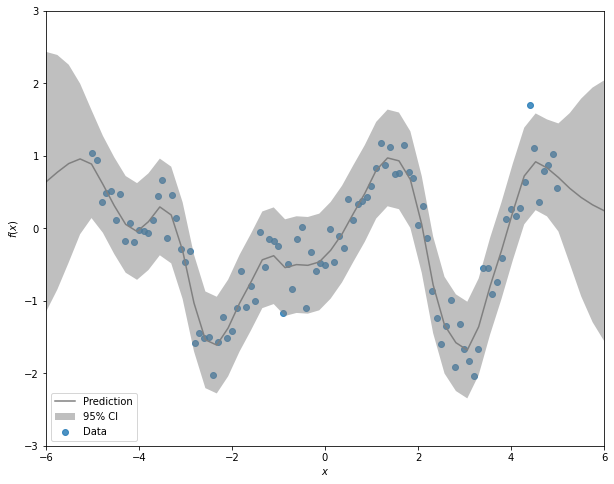

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(x, y, fit_reg=False, label='Data')
plt.plot(x_pred, y_pred, color='grey', label='Prediction')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([y_pred - 2*sigma,
                        (y_pred + 2*sigma)[::-1]]),
         alpha=.5, fc='grey', ec='None', label='95% CI')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(-6, 6)
plt.ylim(-3, 3)
plt.legend(loc='lower left');

And just like that... you now know the exact profile of gold in your gold mine under the mountain, given various sample observations of gold deposits in the mountain.

With ***3 lines of python code*** (not counting the imports)!
```(python)
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(X, y)
```

## 6. GPs with PyMC3

The PyMC project is a very general Python package for probabilistic programming that can be used to fit nearly any Bayesian model. PyMC3 was built on top of [Theano](http://deeplearning.net/software/theano/), an engine for evaluating expressions defined in terms of operations on tensors. Newer version are now built on top of TensorFlow. 

Both Theano and Tensorflow providing automatic differentiation, parallel computation, and dynamic generation of efficient, compiled code.

In [1]:
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as gp_fit:

    ρ = pm.Gamma('ρ', 1, 1)
    η = pm.Gamma('η', 1, 1)
    
    K = η * pm.gp.cov.Matern32(1, ρ)

We speficy a **mean function** (redundant, since a zero function is assumed when not specified) and an observation noise variable, which we will model as a [half-Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution) prior:

In [2]:
with gp_fit:
    
    M = pm.gp.mean.Zero()
    σ = pm.HalfCauchy('σ', 2.5)

`PyMC3`'s Gaussian Process Models are encapsulated within the `gp` class, parameterized by the mean function, covariance function, and observation error. The most common implementation of a GP is the `gp.Marginal` class.

In [3]:
with gp_fit:

    gp = pm.gp.Marginal(mean_func=M, cov_func=K)

The marginal likelihood:

In [7]:
with gp_fit:
    
    y_obs = gp.marginal_likelihood('y_obs', X=X, y=y, noise=σ)

The sample function called inside the Model context fits the model using MCMC sampling. By default, PyMC3 uses an auto-tuning version of Hamiltonian Monte-Carlo (HMC) called the No U-turn Sampler (NUTS) that picks appropriate values for the path length and step size parameters. 

Additionally, to initialize the sampler to reasonable starting parameter values, a variational inference algorithm is run before NUTS, to yield approximate posterior mean values for all the parameters.

But that's details you don't need to know :-)

In your notebook, you will probably have to remove `njobs=1` and replace it with `cores=1`. Also, if your laptop's kernel dies or is too slow with the API call below, replace it with the commented out lines of code below. If NUTS dies, restrict cores and chains. If that's still no good, do Metropolis instead!

In [8]:
with gp_fit:
    
    trace = pm.sample(2000, n_init=500, cores=1)
    # trace = pm.sample(500, n_init=100, chains=2, cores=1)
    # trace = pm.sample(5000, n_init=100, chains=2, cores=1, step=pm.Metropolis())

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Sequential sampling (2 chains in 1 job)
NUTS: [σ, η, ρ]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 156 seconds.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


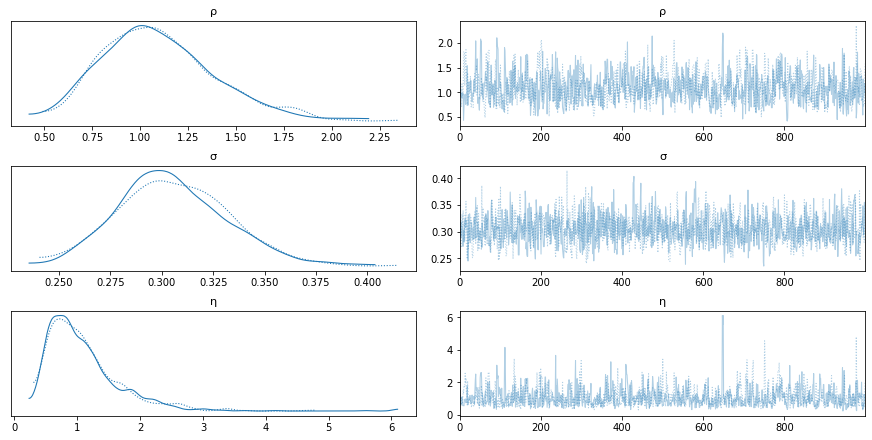

In [9]:
pm.traceplot(trace[-1000:], var_names=['ρ', 'σ', 'η']);

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e690f6cd0>,
      dtype=object)

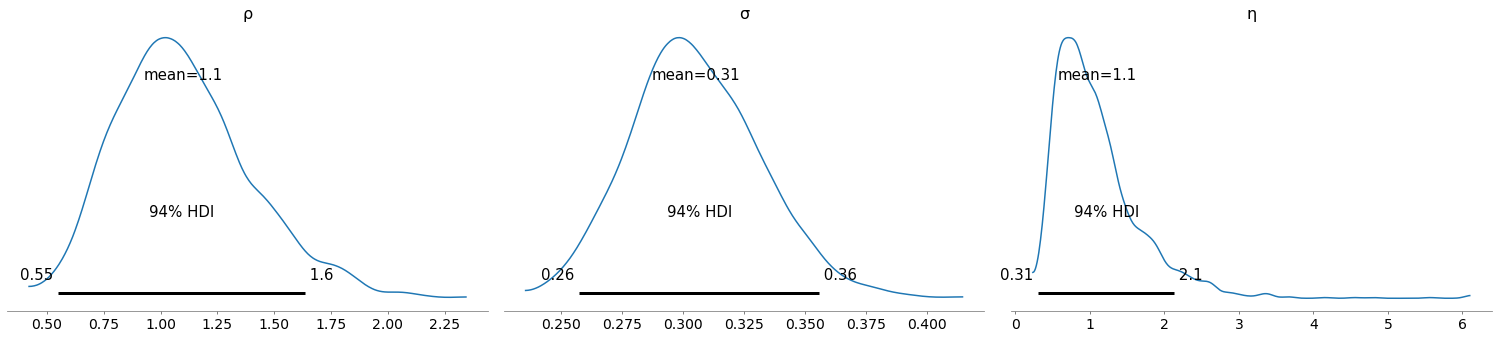

In [10]:
pm.plot_posterior(trace[-1000:], var_names=['ρ', 'σ', 'η'])

The mean values are the best **point estimate approximations** for the hyperparameters ρ, σ, and η:

In [11]:
ρm = trace[-1000:]['ρ'].mean()
ρm 

1.0996003441959132

In [12]:
σm = trace[-1000:]['σ'].mean()
σm 

0.30533647404626174

In [13]:
ηm = trace[-1000:]['η'].mean()
ηm 

1.0902332045386836

Let's collect the results into a pandas dataframe to display:

In [14]:
import pandas as pd


In [15]:
mm = [ρm, σm, ηm]

In [16]:
pd.DataFrame({"Parameter": ['ρ', 'σ', 'η'],
              "best approximation": [ρm, σm, ηm]})

,Parameter,best approximation
0,ρ,1.099600
1,σ,0.305336
2,η,1.090233


These should fit the [Maximum A Posteriori](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) estimate, which we can also tabulate from PyMC3:

In [17]:
with gp_fit:
    mp = pm.find_MAP()

In [18]:
mp

{'η': array(0.66271306),
 'η_log__': array(-0.41141317),
 'ρ': array(0.89834619),
 'ρ_log__': array(-0.10719977),
 'σ': array(0.3008975),
 'σ_log__': array(-1.2009856)}

In [19]:
# "mp" stands for marginal posterior
pd.DataFrame({"Parameter": ['ρ', 'σ', 'η'],
              "Value at MAP": [float(mp["ρ"]), float(mp["σ"]), float(mp["η"])]})

,Parameter,Value at MAP
0,ρ,0.898346
1,σ,0.300898
2,η,0.662713


#### Hmm... my MAP values do not coincide with my trace means.. Did I do something wrong, or is that ok because we are running a probabilistic algorithm?

In addition to fitting the model, we would like to be able to generate ***predictions***!

This implies sampling from the **posterior predictive distribution**, which if is just some simple ;-) linear algebra:

$$\begin{aligned}
m^*(x^*) &= k(x^*,x)^T[k(x,x) + \sigma^2I]^{-1}y \\
k^*(x^*) &= k(x^*,x^*)+\sigma^2 - k(x^*,x)^T[k(x,x) + \sigma^2I]^{-1}k(x^*,x)
\end{aligned}$$

PyMC3 allows for predictive sampling after the model is fit, using the recorded values of the model parameters to generate samples. The `gp.conditional` function implements the predictive GP above, called with a grid of points over which to generate realizations:

Let's generate predictions for the profile of our gold deposits, based on drillined site samples (our observations):

In [20]:
Z = np.linspace(-6, 6, 100).reshape(-1, 1)

with gp_fit:

    y_pred = gp.conditional("y_pred", Xnew=Z, pred_noise=True)

In [21]:
# To use the point estimate hyperparameter values, replace the trace with a length-1 list with `mm`
with gp_fit:
    y_samples = pm.sample_posterior_predictive([mp], var_names=["y_pred"], samples=500)

In [25]:
# To use the point estimate hyperparameter values, replace the trace with a length-1 list with `mm`
with gp_fit:
    y_samples = pm.sample_posterior_predictive([mm], var_names=["y_pred"], samples=500)

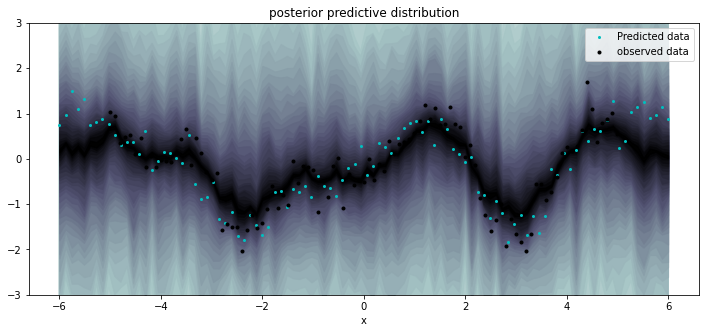

In [29]:
# MAP values plot

fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# posterior predictive distribution
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, y_samples["y_pred"], Z, plot_samples=False, palette="bone_r");

# overlay a scatter of one draw of random points from the posterior predictive distribution
plt.plot(Z, y_samples["y_pred"][200, :].T, "co", ms=2, label="Predicted data");

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
#plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-3,3]);
plt.title("posterior predictive distribution"); plt.legend();

In [26]:
y_samples["y_pred"]

array([[ -8.63822406,  -1.63517681,  -6.76885989, ...,  -0.46697501,
         -0.84525206,  -2.28080787],
       [ -0.33099529,  -0.95324492,  -1.08927092, ...,   2.35965969,
         -2.43008034,   1.92678035],
       [ -4.16279129,   9.2054415 ,  -7.78759138, ..., -26.71959878,
        -26.51454804,  10.21867612],
       ...,
       [ -3.13521705,   1.21662519,  -2.85001405, ...,  -1.12432399,
         -4.93087282,   1.0481619 ],
       [  0.30708157,  -1.01987336,  -0.67511519, ...,   1.03660827,
         -0.69199557,   1.96091341],
       [  2.68724752,  -0.26764354,   1.4471916 , ...,  -1.39314163,
         -1.63326022,  -0.16670629]])

Plot predictions:

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

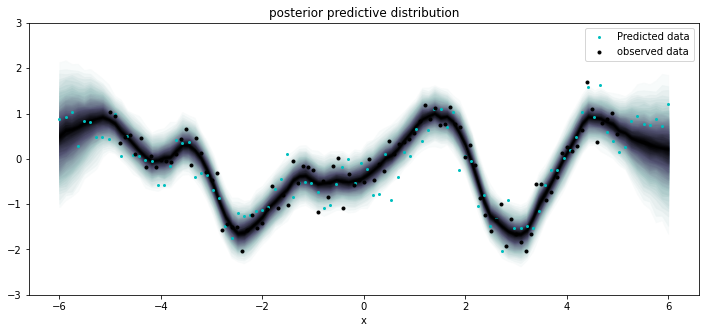

In [24]:
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# posterior predictive distribution
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, y_samples["y_pred"], Z, plot_samples=False, palette="bone_r");

# overlay a scatter of one draw of random points from the posterior predictive distribution
plt.plot(Z, y_samples["y_pred"][200, :].T, "co", ms=2, label="Predicted data");

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
#plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-3,3]);
plt.title("posterior predictive distribution"); plt.legend();

Not too shabby, ay?

</br >
<center>
<img src="ipynb.images/scoobydoo.png" width=400 />
</center>

For models being fit to very large datasets, one often finds MCMC fitting to work too slowly, as the log-probability of the model needs to be evaluated at every iteration of the sampling algorithm. 

In these situations, it may be worth using variational inference methods (which replace the true posterior with a simpler approximation), or even just Metropolis. 

Don't forget.. the PyMC3 GP algorithms were implemented by students. *Good* students, but still.. students. You will find by googling a bit that researchers prefer other GP libraries that are faster, such as `celerite`. 

## 7. GP Lab

Now, ***you*** do it!

Let's define points at which our family of priors will be sampled: 75 evenly spaced points between -5 and 5. 

How are we going to build the functions $f_1, \cdots, f_n$ that we're going to use as our *priors*? We're going to create a list of $x_1, \cdots, x_n$, and we're going to use the gaussian as our similarity (or kernel) function:

$$k(x_p, x_q) = \mathrm{exp}\left[ -\frac{(x_p - x_q)^2}{2 \ell^2} \right]$$

The kernel function expresses the similarity of each observed to each other observed, or in other words their degree of correlation. The gaussian calculates the squared distance between points and converts it into a measure of similarity, controlled by a tuning parameter $\ell$. We assume a mean of 0 for our prior.


Then we compute the Cholesky decomposition of the covariance matrix. 

By multiplying the Cholesky with 3 different gaussian random variates, we get 3 prior functions, which we plot, so we can admire our handywork!

```(python)
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
```

So, let's create an array on the x-axis (observations):

```(python)
# Test data
n = 100
Xtest = np.linspace(-5, 5, n).reshape(-1,1)
#print(Xtest)
```

Let's define the kernel function (a gaussian, with a parameter which represents a length squared):

```(python)
# Define the gaussian kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)
```

Let's build the covariance matrix of our observations:
```(python)
param = 0.1
K_ss = kernel(Xtest, Xtest, param) #this is K_**
```

To get the basis functions from our covariance matrix, ***just to see what they look like***, Let's compute the [Cholesky decomposition]() (square root) of the covariance matrix. 

It's just a bit more complicated version of the same linear algebra decompostion that we did with our eigevector matrix to prove that the power of a Markovian stochastic transition matrix is easy to compute if you know the eigenvalues and eigenvectors. 

```(python)
L = np.linalg.cholesky(K_ss + 1e-10*np.eye(n))
```

Now, sample 2 sets of standard normal distributions for our test points, and multiply them by the square root of the covariance matrix:
```(python)
f_prior = np.dot(L, np.random.normal(size=(n,2)))
```

Now plot the 2 sampled functions:
```(python)
pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
pl.title('Two samples from the GP prior')
```

<div style="display:none;">
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

# Test data
n = 100
Xtest = np.linspace(-5, 5, n).reshape(-1,1)
#print(Xtest)

# Define the gaussian kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param) #this is K_**

# Get cholesky decomposition (square root) of the covariance matrix
L = np.linalg.cholesky(K_ss + 1e-10*np.eye(n))

# Sample 3 sets of standard normal distributions for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,2)))

# Now plot the 2 sampled functions
pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP prior')
</div>

***All right, all right, all right***!

So the functions above are not modelling our data. Thet are just **basis functions** that will allow us to model our data, *much in the same way that eigenvectors are basis vectors that allow us to express the transformation of a vector by a transition matrix A as a linear combination of the eigenvectors of A with the eigenvalues as multiplicative factors*. 

They are our priors the same way you pick some parameter values as your priors when you assume a Bayesian probabilistic model, and you want to find the posterior of these parameters given your dataset and your likelihood function.

- It's good to be able to look at a few of them, much like it's always good to look at samples of datasets

Now, we're going use the functions above as our **priors**. We will compute the covariance matrix of our training data, and its Cholesky decomposition. We will add a small perturbation on the diagonals (`np.eye` is the matrix with 1 in its diagonals, 0 otherwise), to ***add numerical stability to our Cholesky decomposition*** (Cholesky is very unstable).

Let's ***simulate some data***. This will be our **training data**: We will pick 5 $(x,y)$ points from the simulated dataset. Let's use the `sin` function to generate the dataset (the $y$ values from our $x$ values).
```(python)
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1, 1.5, 3.5]).reshape(7,1)
ytrain = np.sin(Xtrain)
```

Let's apply the kernel function to our training points:
```(python)
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))
```

Compute the mean at our test points:
```(python)
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))
```

Compute the standard deviation so we can plot it:
```(python)
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
```

Now, draw samples from the posterior at our test points:
```(python)
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))
```

and plot!
```(python)
pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()
```

<div style="display:none;">
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1, 1.5, 3.5]).reshape(7,1)
ytrain = np.sin(Xtrain)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()
</div>

***All right, all right, allright***!

Observe how the training points (blue squares in the output above) have "corraled" the set of possible functions: The ones we sampled from the posterior to go through the training points. The dotted red line shows the mean output and the grey area shows 2 standard deviations from the mean. 

Note that the standard deviation is 0 at our training points because we did not add any noise to our data. Also note how things start to go a bit wild again to the right of our last training point $x = 1$. That won’t get reined in until we observe some data over there, or by adding additional constraints on the herky-jerky nature of our posterior functions.


Ok, so the computation above only used `numpy`. Now we're going to leverage `PyMC3` to do GP estimation.

PyMC3's `gp.Marginal` class implements a common case of GP regression, where the observed data are the sum of a GP and Gaussian noise. In other words, the observations $y$ are the unknown function to model, plus noise:

$$\begin{split}\begin{aligned}
  \epsilon &\sim N(0, \Sigma) \\
  y &= f(x) + \epsilon \\
\end{aligned}\end{split}$$

We are going to use the [Matern](https://en.wikipedia.org/wiki/Mat%C3%A9rn_covariance_function) 5/2, a smooth kernel function. 

We draw random samples from a [multivariate normal distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.multivariate_normal.html) (generalization of the one-dimensional normal distribution to higher dimensions), which we're not supposed to know (we're going to use that to match with the final result to see how well our model performs). Then we add some noise with `σ_true * np.random.randn(n)` and *that* becomes our observations (what we know). We flatten to one dimension using numpy's `.flatten()` (read [here](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.flatten.html0)). And we plot the original data (generator) and the noisy data (observations). Change the random seed and see the data change!

Again, it is a well-known fact that when two training inputs are too close in input space, the covariance matrix may become not-positive definite. As a result, the [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition) of the covariance matrix, necessary for GP computations, may fail due to numerical error. The standard solution to alleviate ill-conditioning is to add a **ridge** or **nugget** to the diagonal of the covariance matrix, which amounts to adding (or increasing, if already present) **observation noise**. We do this below with `+ 1e-8*np.eye(n)`. We're inoculating ourselves to ill-conditioning. But just to be safe, we don't take *too many* data points, just 100 between 0 and 10. If you blow up with a different seed or by changing any other parameters, I'd like to take a look..

Another option consists in just altering the troublesome points. Essentially, the observation is that close-by points are highly redundant, in fact so redundant that they reduce the rank of the covariance matrix. Since one those points is contributing little information to the problem at hand, removing one or the other (or averaging them, or "bouncing" one point away from the other to some minimal acceptable distance) will not really change your solution all that much.

BTW, if anyone thinks this math is too tough, note that PyMC3's `gp.Marginal` was written by students (like you) at Google's summer code camp 2017 (go [here](https://github.com/pymc-devs/pymc3/releases) and browse over to the manifest for v3.2 Final: *This version includes two major contributions from our Google Summer of...*). Wanna work for Google?

</br >
<center>
<img src="ipynb.images/googleTshirt.png" width=200 />
</center>

Let's use the [Matern covariance function](https://en.wikipedia.org/wiki/Mat%C3%A9rn_covariance_function):

```(python)
import pymc3 as pm
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# set the seed
np.random.seed(25)

n = 100 # The number of data points
X = np.linspace(0, 10, n)[:, None] # The inputs to the GP, note: They must be arranged as a column vector for PyMC3

# Define the true covariance function and its hyper-parameters
ℓ_true = 1.0
η_true = 3.0
cov_func = η_true**2 * pm.gp.cov.Matern52(1, ℓ_true)
```

A mean function that is zero everywhere:
```(python)
mean_func = pm.gp.mean.Zero()
```

The latent function (equivalent to the likelihood in Bayesian classical estimation) values are a sample from a multivariate normal distribution.

Note that we have to call `eval()` because PyMC3 is built on top of Theano (for the version living on professor's laptop). I don't know what will actually happen if you don't have theano installed. Maybe install it (sorry, professor very lazy, when his code works, he bikes home happy, does not mess with perfection)?
```(python)
f_true = np.random.multivariate_normal(mean_func(X).eval(),
                                       cov_func(X).eval() + 1e-8*np.eye(n), 1).flatten()
```

The observed data is the latent function plus a small amount of Gaussian noise.

The standard deviation of the noise is `sigma`:
```(python)
σ_true = 2.0
y = f_true + σ_true * np.random.randn(n)
```

Plot the data and the (unobserved) latent function. Hopefully, our Gaussian Process yields an approximation of the data that is as close as possible to the latent function.
```(python)
fig = plt.figure(figsize=(12,5)); ax = fig.gca()
ax.plot(X, f_true, "dodgerblue", lw=3, label="True f");
ax.plot(X, y, 'ok', ms=3, alpha=0.5, label="Data");
ax.set_xlabel("X"); ax.set_ylabel("The true f(x)"); plt.legend();
```

<div style="display:none;">
import pymc3 as pm
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# set the seed
np.random.seed(25)

n = 100 # The number of data points
X = np.linspace(0, 10, n)[:, None] # The inputs to the GP, note: They must be arranged as a column vector for PyMC3

# Define the true covariance function and its hyper-parameters
ℓ_true = 1.0
η_true = 3.0
cov_func = η_true**2 * pm.gp.cov.Matern52(1, ℓ_true)

# A mean function that is zero everywhere
mean_func = pm.gp.mean.Zero()

# The latent function values are one sample from a multivariate normal distribution
# Note that we have to call `eval()` because PyMC3 is built on top of Theano
f_true = np.random.multivariate_normal(mean_func(X).eval(),
                                       cov_func(X).eval() + 1e-8*np.eye(n), 1).flatten()

# The observed data is the latent function plus a small amount of Gaussian noise
# The standard deviation of the noise is `sigma`
σ_true = 2.0
y = f_true + σ_true * np.random.randn(n)

## Plot the data and the unobserved latent function
fig = plt.figure(figsize=(12,5)); ax = fig.gca()
ax.plot(X, f_true, "dodgerblue", lw=3, label="True f");
ax.plot(X, y, 'ok', ms=3, alpha=0.5, label="Data");
ax.set_xlabel("X"); ax.set_ylabel("The true f(x)"); plt.legend();
</div>

***All right, all right, all right***!

Now that we have our observations $y$, we model the hyperparameters as a gamma and two Half-Cauchys. The [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution) distribution is used quite  bit in stastics, and in particular the half-Cauchy has had a lot of [success](http://andrewgelman.com/2011/07/13/on_the_half-cau/) in modeling Bayesian model hyperparameters. Don't worry about this. This is just trial and error of many different ways to model hyperparameters, and this one is particularly successful.

We run an MCMC algorithm to find the [Maximum A Posteriori](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) estimate of the hyperparameters and tabulate them:
```(python)
with pm.Model() as model:
    #ℓ = pm.Gamma("ℓ", alpha=2, beta=1)
    ℓ = pm.HalfCauchy("ℓ", beta=1)
    η = pm.HalfCauchy("η", beta=5)

    cov = η**2 * pm.gp.cov.Matern52(1, ℓ)
    gp = pm.gp.Marginal(cov_func=cov)

    σ = pm.HalfCauchy("σ", beta=5)
    y_ = gp.marginal_likelihood("y", X=X, y=y, noise=σ)

    mp = pm.find_MAP()
```

<div style="display:none;">
with pm.Model() as model:
    #ℓ = pm.Gamma("ℓ", alpha=2, beta=1)
    ℓ = pm.HalfCauchy("ℓ", beta=1)
    η = pm.HalfCauchy("η", beta=5)

    cov = η**2 * pm.gp.cov.Matern52(1, ℓ)
    gp = pm.gp.Marginal(cov_func=cov)

    σ = pm.HalfCauchy("σ", beta=5)
    y_ = gp.marginal_likelihood("y", X=X, y=y, noise=σ)

    mp = pm.find_MAP()
</div>

***All right, all right, all right***!

Now collect the results into a pandas dataframe to display. "mp" stands for **m**arginal **p**osterior
```(pandas)
pd.DataFrame({"Parameter": ["ℓ", "η", "σ"],
              "Value at MAP": [float(mp["ℓ"]), float(mp["η"]), float(mp["σ"])],
              "True value": [ℓ_true, η_true, σ_true]})
```

<div style="display:none;">
# collect the results into a pandas dataframe to display
# "mp" stands for marginal posterior
pd.DataFrame({"Parameter": ["ℓ", "η", "σ"],
              "Value at MAP": [float(mp["ℓ"]), float(mp["η"]), float(mp["σ"])],
              "True value": [ℓ_true, η_true, σ_true]})
</div>

***All right, all right, all right***!

We used the GP + noise to find the optimal hyperparameters.

PyMC3's `.conditional` has an optional flag for `pred_noise`, which defaults to False. When `pred_noise=False`, the conditional method produces the predictive distribution for the underlying function represented by the GP. When `pred_noise=True`, the conditional method produces the predictive distribution for the GP ***plus noise***.

Let's plot just the estimated GP ***without the noise*** on an increased x-axis.
```(python)
# new values from x=0 to x=20
X_new = np.linspace(0, 20, 600)[:,None]

# add the GP conditional to the model, given the new X values
with model:
    f_pred = gp.conditional("f_pred", X_new)

# To use the MAP values, you can just replace the trace with a length-1 list with `mp`
with model:
    pred_samples = pm.sample_ppc([mp], vars=[f_pred], samples=2000)
```

<div style="display:none;">
# new values from x=0 to x=20
X_new = np.linspace(0, 20, 600)[:,None]

# add the GP conditional to the model, given the new X values
with model:
    f_pred = gp.conditional("f_pred", X_new)

# To use the MAP values, you can just replace the trace with a length-1 list with `mp`
with model:
    pred_samples = pm.sample_ppc([mp], vars=[f_pred], samples=2000)
</div>

***All right, all right, all right***!

Let's plot! 

Note that the shading underscores that we're plotting a probability distribution, so it's maximal at the core and then dies out towards its standard deviations.
```(python)
# plot the results
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, pred_samples["f_pred"], X_new);

# plot the data and the true latent function
plt.plot(X, f_true, "dodgerblue", lw=3, label="True f");
plt.plot(X, y, 'ok', ms=3, alpha=0.5, label="Observed data");

# axis labels and title
plt.xlabel("X"); plt.ylim([-13,13]);
plt.title("Posterior distribution over $f(x)$ at the observed values"); plt.legend();
```

<div style="display:none;">
# plot the results
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, pred_samples["f_pred"], X_new);

# plot the data and the true latent function
plt.plot(X, f_true, "dodgerblue", lw=3, label="True f");
plt.plot(X, y, 'ok', ms=3, alpha=0.5, label="Observed data");

# axis labels and title
plt.xlabel("X"); plt.ylim([-13,13]);
plt.title("Posterior distribution over $f(x)$ at the observed values"); plt.legend();
</div>

***All right, all right, all right***!

So the reason the posterior is so close to the True generating function is because we only predicted $f_∗$, not $f_∗$ + noise, which is what we actually observe. So let's set `pred_noise=True`:
```(python)
with model:
    y_pred = gp.conditional("y_pred", X_new, pred_noise=True)
    y_samples = pm.sample_ppc([mp], vars=[y_pred], samples=2000)
```

<div style="display:none;">
with model:
    y_pred = gp.conditional("y_pred", X_new, pred_noise=True)
    y_samples = pm.sample_ppc([mp], vars=[y_pred], samples=2000)
</div>

***All right, all right, all right***!

Let's plot:
```(python)
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# posterior predictive distribution
plot_gp_dist(ax, y_samples["y_pred"], X_new, plot_samples=False, palette="bone_r");

# overlay a scatter of one draw of random points from the
#   posterior predictive distribution
plt.plot(X_new, y_samples["y_pred"][800, :].T, "co", ms=2, label="Predicted data");

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-13,13]);
plt.title("posterior predictive distribution, y_*"); plt.legend();
```

<div style="display:none;">
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# posterior predictive distribution
plot_gp_dist(ax, y_samples["y_pred"], X_new, plot_samples=False, palette="bone_r");

# overlay a scatter of one draw of random points from the
#   posterior predictive distribution
plt.plot(X_new, y_samples["y_pred"][800, :].T, "co", ms=2, label="Predicted data");

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-13,13]);
plt.title("posterior predictive distribution, y_*"); plt.legend();
</div>

***All right, all right, all right***!

The posterior predictive density is ***wider*** than the conditional distribution of the noiseless function, and reflects the predictive distribution of the noisy data, which is marked as black dots. 

But see how our simulated data points match the observed data points pretty well? This is what Data Science is about: We have some observations, and we use these observations to build a **model**. Then we throw away the data, and we can use our model to predict the process uderlying our original observations with very close statistical matching. 

We can also use PyMC3's `.predict` method to return the mean and variance given a particular point. `.predict` returns the same mean and covariance that the distribution of `.conditional` has:
```(python)
# predict
mu, var = gp.predict(X_new, point=mp, diag=True)
sd = np.sqrt(var)
```

<div style="display:none;">
# predict
mu, var = gp.predict(X_new, point=mp, diag=True)
sd = np.sqrt(var)
</div>

***All right, all right, all right***!

Let's plot:
```(python)
# draw plot
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot mean and 2σ intervals
plt.plot(X_new, mu, 'r', lw=2, label="mean and 2σ region");
plt.plot(X_new, mu + 2*sd, 'r', lw=1); plt.plot(X_new, mu - 2*sd, 'r', lw=1);
plt.fill_between(X_new.flatten(), mu - 2*sd, mu + 2*sd, color="r", alpha=0.5)

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-13,13]);
plt.title("predictive mean and 2σ interval"); plt.legend();
```

<div style="display:none;">
# draw plot
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot mean and 2σ intervals
plt.plot(X_new, mu, 'r', lw=2, label="mean and 2σ region");
plt.plot(X_new, mu + 2*sd, 'r', lw=1); plt.plot(X_new, mu - 2*sd, 'r', lw=1);
plt.fill_between(X_new.flatten(), mu - 2*sd, mu + 2*sd, color="r", alpha=0.5)

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-13,13]);
plt.title("predictive mean and 2σ interval"); plt.legend();
</div>

***All right, all right, all right***! 

You are ***done*** with the lab. Congratulations!

Enough with the ***all rights***, professor!
</br >
<center>
<img src="ipynb.images/angry-scoobydoo.png" width=400 />
</center>

## 8. Gaussian Mixture Models

[Gaussian Mixture Models](https://scikit-learn.org/stable/modules/mixture.html) (GMM) are a neat methodolgy for modelling observations that stem from *multiple groupings*. 

A [mixture model](https://en.wikipedia.org/wiki/Mixture_model) is a probabilistic model for representing the presence of subpopulations within an overall population, without requiring that an observed data set should identify the sub-population to which an individual observation belongs. 

Mixture models are used to make statistical inferences about the properties of sub-populations given only observations on the pooled population, without sub-population identity information.

Let's draw normal distributions from 3 different populations and mix them in.

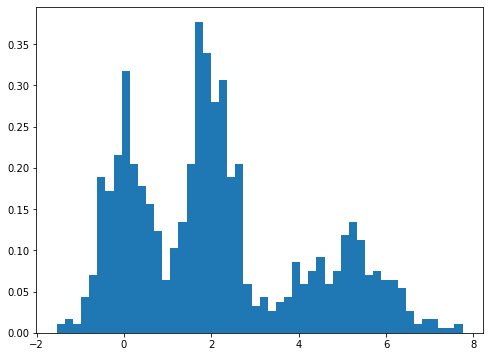

In [48]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import seaborn as sns

SEED = 25
np.random.seed(SEED) 

N = 1000
W = np.array([0.35, 0.4, 0.25])
MU = np.array([0., 2., 5.])
SIGMA = np.array([0.5, 0.5, 1.])

component = np.random.choice(MU.size, size=N, p=W)  #1st arg: arange(MU.size), p: probabilities associated with each 1sy arg entry 
x = np.random.normal(MU[component], SIGMA[component], size=N) #random samples from a normal distribution @ 1st arg

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(x, bins=50, lw=0,density=True);

Specify and fit a marginalized Gaussian mixture model (GMM) to this data in `PyMC3`. Here, we introduce a new pdf called **Dirichlet**. The [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) is the multivariate generalization of the beta distribution (our "baseball" distribution, used to model the behavior of random variables limited to intervals of finite length). It is used a lot in [Natural Language Processing](https://en.wikipedia.org/wiki/Natural_language_processing) (NLP).

The Dirichlet pdf does not sample from the space of real numbers, like the normal pdf does. Instead it samples over a probability simplex (probabilities over $n$ distinct categories, representing the dimensions of our multivariate distribution). A 4-dimentional Dirichlet distribution has 4 parameters. So, it's tailor-made for mixture models.

In [32]:
np.ones_like(W)

array([1., 1., 1.])

In [33]:
with pm.Model() as model_mm:
    w = pm.Dirichlet('w', np.ones_like(W))  #array of ones with the same shape and type as W

    mu = pm.Normal('mu', 0., 10., shape=W.size)
    tau = pm.Gamma('tau', 1., 1., shape=W.size)

    x_obs = pm.NormalMixture('x_obs', w, mu, tau=tau, observed=x)

In [34]:
with model_mm:
    trace_mm = pm.sample(5000, n_init=10000, tune=1000, random_seed=SEED)[1000:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [tau, mu, w]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 50 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


The posterior distribution on the weights and the component means has captured the true value quite well:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


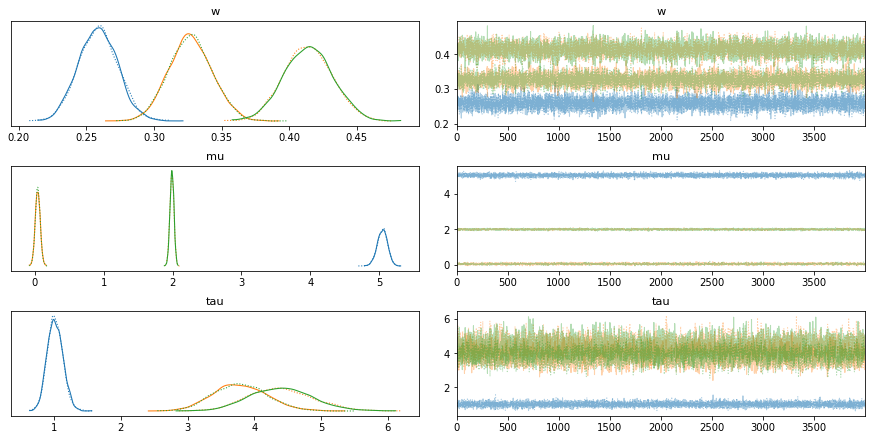

In [39]:
pm.traceplot(trace_mm, var_names=['w', 'mu', 'tau']);

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


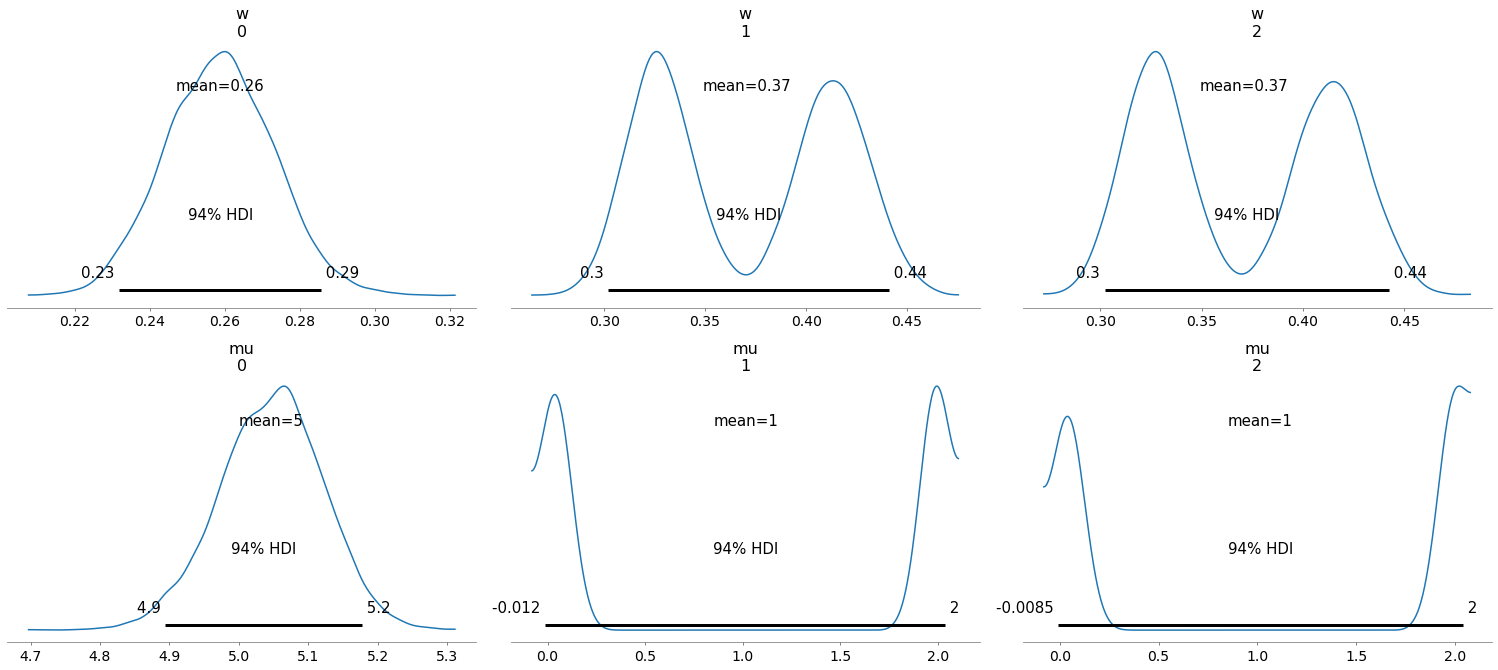

In [41]:
pm.plot_posterior(trace_mm, var_names=['w', 'mu']);

Let's sample from the model’s posterior predictive distribution:

In [46]:
with model_mm:
    ppc_trace = pm.sample_posterior_predictive(trace_mm, 1000, random_seed=SEED)

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


and let's plot:

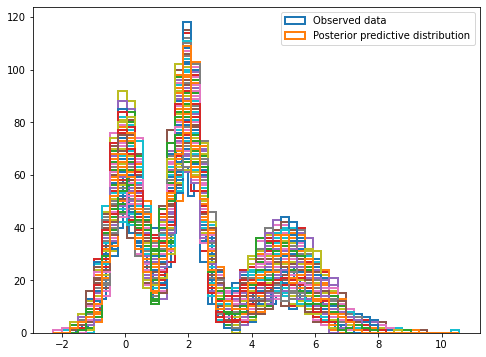

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(x, bins=50,
        histtype='step', lw=2,
        label='Observed data');

ax.hist(ppc_trace['x_obs'], bins=50,
        histtype='step', lw=2,
        label='Posterior predictive distribution');

ax.legend(loc=1);

Not too shabby...

If a sports team is comprised of 11 players, each with his own abilities in passes or distance covered (with a superstar on some teams with way above average abilities, e.g. a Christiano Ronaldo, or a Lionel Messi), then team abilities could be modeled as a GMM. That way, you could go from individual player rankings to complete team rankings.

### Cheating

We are cheating her era little bit, aren't we? We **specify** the number of gaussians in the mixture! It's a bit as if we doing KMeans where we specify the number of **clusters** in the model.

Can we do better? Assume we have another similar one-dimensional distribution:

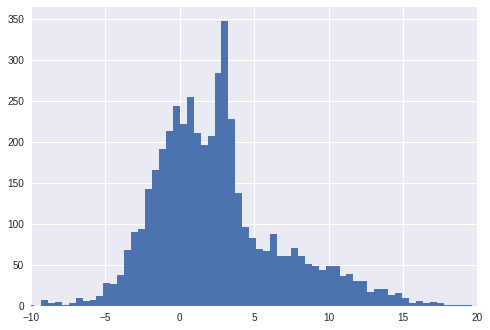

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')

np.random.seed(2)
x = np.concatenate([np.random.normal(0, 2, 2000),
                    np.random.normal(5, 5, 2000),
                    np.random.normal(3, 0.5, 600)])
plt.hist(x, 80)
plt.xlim(-10, 20);

`Scikit-learn`'s Gaussian Mixture Models (GMM) will allow us to approximate this density.

> **NOTE**: You may have to replace:
```(python)
from sklearn.mixture import GMM
```
with:
```(python)
from sklearn.mixture import GaussianMixture.
```
You may have to modify the API to the plotting as well (maybe remove the x-axis)?

Also, one of you told me that a conda-based installation of jupyter notebooks leads to much poorer notebook performance than a pip based installation. Might be worth investigating..

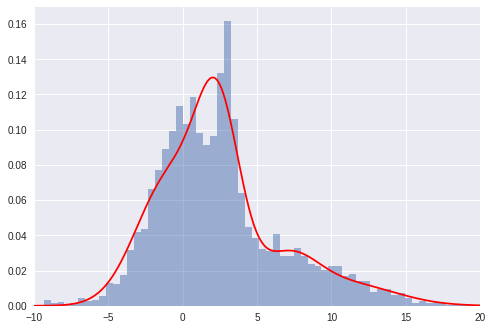

In [116]:
from sklearn.mixture import GaussianMixture
X = x[:, np.newaxis]
clf = GaussianMixture(4,max_iter=1000, random_state=3).fit(X)
xpdf = np.linspace(-10, 20, 1000)
density = np.exp(clf.score_samples(xpdf[:, np.newaxis]))

plt.hist(x, 80, alpha=0.5,density=True)
plt.plot(xpdf.reshape(1000,1), density.reshape(1000,1), '-r')
plt.xlim(-10, 20);

Note that this density is fit using a **mixture of Gaussians**, which we can examine by looking at the ``means_``, ``covars_``, and ``weights_`` attributes:

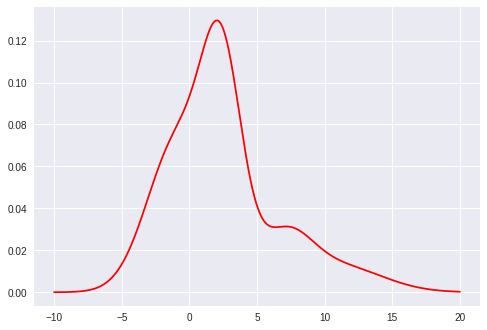

In [113]:
plt.plot(xpdf.reshape(1000,1), density.reshape(1000,1), '-r')

In [94]:
clf.means_

array([[ 2.39320358],
       [11.10146615],
       [-0.92594954],
       [ 7.038217  ]])

In [102]:
clf.covariances_.shape

(4, 1, 1)

In [97]:
clf.weights_

array([0.38379114, 0.09799968, 0.39491057, 0.1232986 ])

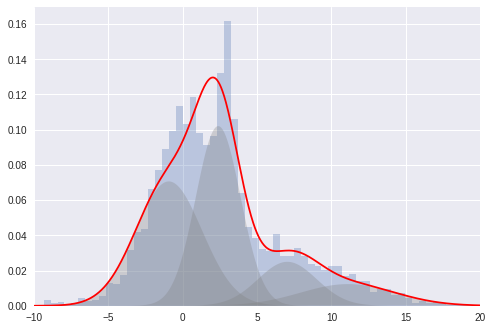

In [117]:
plt.hist(x, 80, alpha=0.3,density=True)
plt.plot(xpdf, density, '-r')

for i in range(clf.n_components):
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0],
                                       np.sqrt(clf.covariances_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(-10, 20);

These individual Gaussian distributions are fit using an expectation-maximization method, much as in K means, except that rather than explicit cluster assignment, the **posterior probability** is used to compute the weighted mean and covariance.
Somewhat surprisingly, this algorithm **provably** converges to the optimum (though the optimum is not necessarily global).

### How many Gaussians?

Given a model, we can use one of several means to evaluate how well it fits the data.
For example, there is the Aikake Information Criterion (AIC) and the Bayesian Information Criterion (BIC).

In [ ]:
print(clf.bic(X))
print(clf.aic(X))

Let's take a look at these as a function of the number of gaussians:

In [ ]:
n_estimators = np.arange(1, 10)
clfs = [GMM(n, n_iter=1000).fit(X) for n in n_estimators]
bics = [clf.bic(X) for clf in clfs]
aics = [clf.aic(X) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.legend();

It appears that for both the AIC and BIC, 4 components is preferred!

### Use Case: GMM For Outlier Detection

GMM is what's known as a **Generative Model**: it's a probabilistic model from which a dataset can be generated.

One thing that generative models can be useful for is **outlier detection**: We can simply evaluate the likelihood of each point under the generative model; the points with a suitably low likelihood (where **suitable** is up to your own bias/variance preference) can be labeled outliers.

Let's take a look at this by defining a new dataset with some outliers:

In [ ]:
np.random.seed(0)

# Add 20 outliers
true_outliers = np.sort(np.random.randint(0, len(x), 20))
y = x.copy()
y[true_outliers] += 50 * np.random.randn(20)

In [ ]:
clf = GMM(4, n_iter=500, random_state=0).fit(y[:, np.newaxis])
xpdf = np.linspace(-10, 20, 1000)
density_noise = np.exp(clf.score(xpdf[:, np.newaxis]))

plt.hist(y, 80, normed=True, alpha=0.5)
plt.plot(xpdf, density_noise, '-r')
plt.xlim(-15, 30);

Now let's evaluate the log-likelihood of each point under the model, and plot these as a function of ``y``:

In [ ]:
log_likelihood = clf.score_samples(y[:, np.newaxis])[0]
plt.plot(y, log_likelihood, '.k');

In [ ]:
detected_outliers = np.where(log_likelihood < -9)[0]

print("true outliers:")
print(true_outliers)
print("\ndetected outliers:")
print(detected_outliers)

The algorithm **misses** a few of these points, which is to be expected (some of the "outliers" actually land in the middle of the distribution!)

Here are the outliers that were missed (false negatives):

In [ ]:
set(true_outliers) - set(detected_outliers)

And here are the non-outliers which were spuriously labeled outliers (false positives):

In [ ]:
set(detected_outliers) - set(true_outliers)

Although all of the above is done in one dimension, GMM does generalize to multiple dimensions!

### Other Density Estimators

The other main density estimator that you might find useful is *Kernel Density Estimation*, which is available via ``sklearn.neighbors.KernelDensity``. In some ways, this can be thought of as a generalization of GMM where there is a gaussian placed at the location of *every* training point!

In [ ]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(0.15).fit(x[:, None])
density_kde = np.exp(kde.score_samples(xpdf[:, None]))

plt.hist(x, 80, density=True, alpha=0.5)
plt.plot(xpdf, density, '-b', label='GMM')
plt.plot(xpdf, density_kde, '-r', label='KDE')
plt.xlim(-10, 20)
plt.legend();

All of these density estimators can be viewed as **Generative models** of the data: that is, that is, the model tells us how more data can be created which fits the model.

## Conclusion

A **covariance function** is the crucial ingredient in a **Gaussian Process** (GP) predictor. It ***encodes our assumptions about the function which we wish to learn*** and which ***passes through all our observations*** and ***has the highest probability to represent the rule behind the process*** that generates our observations. That is why we started the notebook with simple **point-estimates of covariance** for univariate distributions, then the **covariance matrix** for multivariate distribtions, and finally a **covariance function** (such as the Matern) for GPs.

In **supervised learning**, the notion of similarity between data points is ***crucial***. It is a basic similarity assumption that points with inputs $x$ which are close are likely to have similar target values $y$, and thus training points (prior distributions) that are near to a test point (posterior distributions) should be informative about the prediction at that point. Under the Gaussian process view, it is the covariance function that deﬁnes nearness or similarity.

</br >
<center>
<img src="ipynb.images/GPs2.png" width=900 />
    *Observations define the data points that inform likelhood, mean, and covariance functions*
</center>
<br />

How do GPs differ from classical Bayesian estimation? Rather than work in **parameter space**, which is where all the priors live, we can just work in **data space**. This allows us to worry only about how different data points relate to one another without needing to specify the parameters of the data generating process. We say that this method is **non-parametric**, in the same way that regression trees are non-parametric (even though the covariance function is *very* parametric).

The **posterior predictive distribution** encapsulates our uncertainty about the data generating process. The choice of covariance kernel —which says how different observations inform one another—, implies certain properties of the data generating process (this is essentially a hyperparameter of our model).

Here's some math we skipped, but which is important should you decide to concentrate more on GPs:

- [Mercer’s theorem](https://en.wikipedia.org/wiki/Mercer%27s_theorem) allows you to express the covariance function (under certain conditions) in terms of its **eigenfunctions and eigenvalues**.

- A general name for a function $k$ of two arguments mapping a pair of inputs$x ∈ X$, $x_0 ∈ X$ into the set of real numbers is called a **kernel**. This term arises in the theory of integral [operators](https://en.wikipedia.org/wiki/Operator_theory).

- Given a set of input points ${x_i\;|\;i = 1,\cdots,n}$ we can compute the [Gram matrix](https://en.wikipedia.org/wiki/Gramian_matrix) $K$ whose entries are $K_{ij} = k(x_i,x_j)$. If $k$ is a covariance function, we call the matrix $K$ the **covariance matrix**.

- A real $n × n$ matrix $K$ which satisﬁes $Q(v) = v^TKv ≥ 0$ for all vectors $v$ $∈ R^n$ is called **positive semideﬁnite** (PSD). If $Q(v) = 0$ only when $v = 0$, the matrix is **positive deﬁnite**. $Q(v)$ is called a **quadratic form**. A symmetric matrix is PSD if and only if all of its eigenvalues are non-negative. A Gram matrix corresponding to a general kernel function need not be PSD, but the Gram matrix corresponding to a covariance function is PSD.

The theoretical basis for GPs was developed by the French mathematician [Georges Matheron](https://en.wikipedia.org/wiki/Georges_Matheron) in 1960, based on the Master's thesis of [Danie G. Krige](https://en.wikipedia.org/wiki/Danie_G._Krige), the pioneering plotter of distance-weighted average gold grades at the [Witwatersrand reef complex](https://en.wikipedia.org/wiki/Witwatersrand) in South Africa. Krige sought to estimate the most likely distribution of gold based on samples from a few boreholes. Thus, [kriging](https://en.wikipedia.org/wiki/Kriging). 

- [Norbert Wiener](https://en.wikipedia.org/wiki/Norbert_Wiener) (USA) and [Andrey Kolmogorov](https://en.wikipedia.org/wiki/Andrey_Kolmogorov) (Russia) pioneered some of the earlier, related, work on interpolation techniques.

### In a nutshell
A set of values (samples) is observed, each value associated with a spatial location. The covariance between *any two* samples is the covariance function (or kernel) of the Gaussian Process (GP) evaluated at the spatial location of the two points. 

Now, a new value (test point) can be predicted at any new spatial location, by combining the Gaussian prior with a Gaussian likelihood function for each of the observed values. The resulting posterior distribution is also Gaussian, with a mean and covariance that can be simply computed from the observed values, their variance, and the kernel matrix derived from the prior.

GPs are a very expressive theoretical framework. No analytic prior to remember other than picking the right kernel functions, appropriate to the observations' smoothness and other global characteristics (picking hyperparameters continues to be the most delicate, unavoidable, part. 

- Even in Machine Learning! I've been to a few [talks](http://proceedings.mlr.press/v54/jun17a/jun17a.pdf) that posit parameterless approaches, but so far too soon to tell. 

To learn [more](http://www.gaussianprocess.org/gpml/) about GPs, and [more](http://people.cs.ubc.ca/~murphyk/MLbook/) about probabilistic machine learning, visit the links and play around with the experiments in this notebook.

# Conclusion
Gaussian processes yield best models for smooth data where computations remina straightforward enough enough for a small numner of dimensions. When the numer of dimensions start getting large (e.g. dozens), then the algebra becomes too complex, and geometrical approaches work better (i.e. using graphs to build surfaces and backpropagation to improve the fit, also known as **deep learning**) than statistical approaches.

# Homework

Find an ecology/climate-warming interesting dataset with a distribution of a variable that is probably due to the superposition of multiple data sources.

Then, model the dependent variable with `scikit-learn`'s GP and draw a smooth interpolation with a range of missing datapoints. Which of the 3 methods yield better results?

[Here](https://github.com/dinorows/ventilator-sharing)'s an example.

## Bonus

Repeat with `PyMC3` instead of `scikit-learn`.